## Overview  
This is a Logistic Regression Model fit to the kaggle Titanic dataset  

https://www.kaggle.com/c/titanic/data

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Data Cleaning](#data_cleaning)
* [Convert Categorial Features](#convert_categorical)
* [Splitting the data into training and testing sets](#split_data)
* [Create and Train the Model](#train_model)
* [Model Evaluation](#model_eval)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [2]:
#retrieve .csv training dataset
train = pd.read_csv('titanic_train.csv')

In [3]:
#view and explore/understand data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#view description of dataset
#print(boston.DESCR)

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [4]:
#verify desired columns are present; the 'target' values are missing so append target values as new column to dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Data**

<AxesSubplot:>

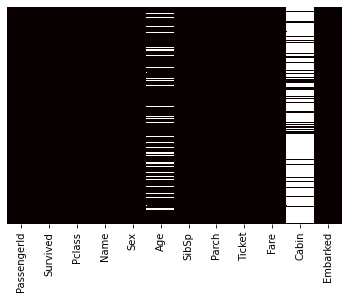

In [15]:
#we can use seaborn to create a heatmap to see where we are missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='hot')
#white bars represent where train.isnull() is true (missing data)

We'll likely impute values for the missing 'Age' data, and drop the 'Cabin' feature

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

In [15]:
#sns.pairplot(df)

In [20]:
#sns.displot(train['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

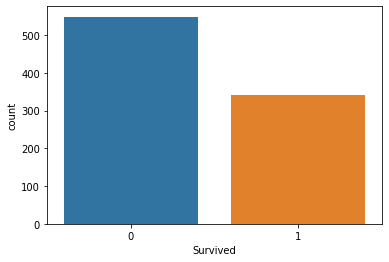

In [25]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

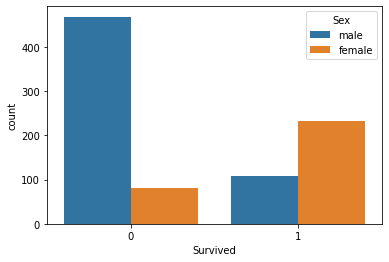

In [27]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

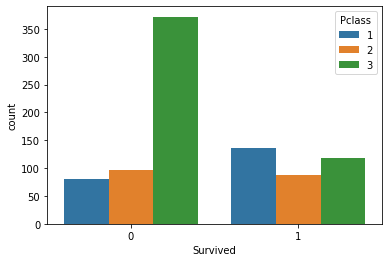

In [29]:
sns.countplot(x='Survived',hue='Pclass',data=train)

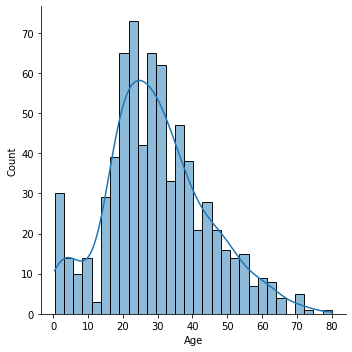

In [35]:
#omit nulls, .dropna()
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

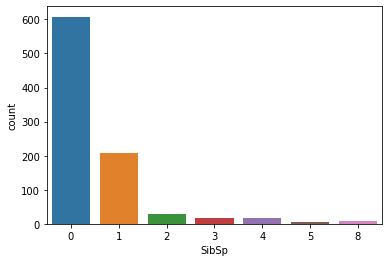

In [36]:
sns.countplot(x='SibSp',data=train)

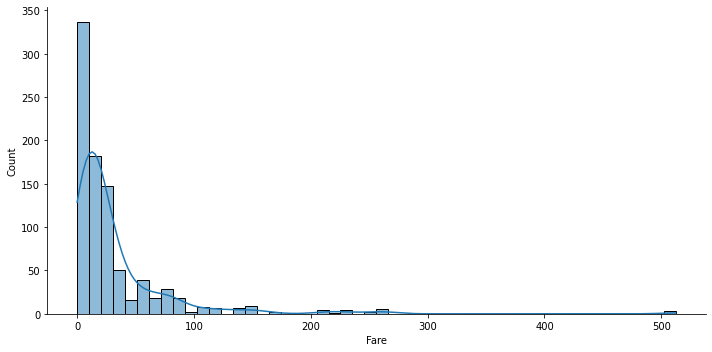

In [53]:
sns.displot(train['Fare'].dropna(),kde=True,bins=50,height=5,aspect=2)

Can use cufflinks library for interactive plots

In [54]:
#import cufflinks as cf
#cf.go_offline()

In [58]:
#train['Fare'].iplot(kind='hist',bins=50)

In [37]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
#create a correlation matrix, round to 2 decimal places
correlation_matrix = train.corr().round(2)
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<AxesSubplot:>

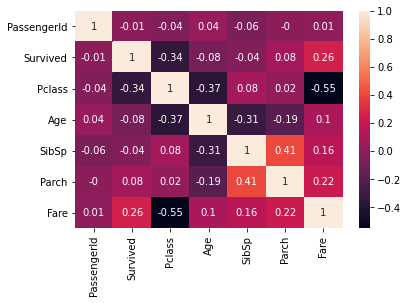

In [19]:
#plot the correlation matrix as a heat map
sns.heatmap(data=correlation_matrix,annot=True)

#sns.heatmap(data=df.corr().round(2),annot=True)


<a class="anchor" id="data_cleaning"></a>
## Data Cleaning

**Impute Values where necessary**

In [78]:
(train['Age'].isnull().sum())/(train['PassengerId'].count())
#About 20% of the 'Age' attribute is missing, we'll replace these missing values with the mean age

0.19865319865319866

We can simply use the mean age of all passengers (option 1), or we can attempt to use a more accurate imputation value and split on another feature (ex/mean age by passenger class) (option 2)

In [112]:
#Option 1: We can fill in the missing values by passing a mean calculation through the .fillna() function
#REMINDER, need to make this change 'inplace = True' to permanently apply to the dataframe
# train['Age'].fillna(train['Age'].mean()) 
# train.isnull().sum()

Text(0.5, 1.0, 'Age by Passenger Class')

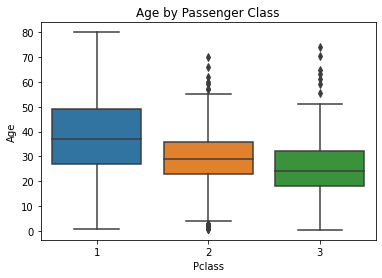

In [113]:
#Option 2
sns.boxplot(x='Pclass',y='Age',data=train)
plt.title('Age by Passenger Class')

In [122]:
#Mean of all passengers
#train['Age'].mean()

In [114]:
#Group by Pclass
by_Pclass = train.groupby('Pclass')

In [123]:
#Mean of passengers by Pclass; loop through Age by Pclass and calculate mean

# for i in range(1,max(by_PClass['Pclass'].max())+1):
#     print(by_Pclass['Age'].mean().loc[i])
    

In [121]:
def impute_age(cols):
    #we apply this function to the 'Age' series in the next step;
    #during that step we pass the Age series data into this function as a tuple;
    #we pass 'Age' and 'Pclass', so within this function we unpack that tuple and assign to the correct variable below (Age at index 0, Pclass at index 1)
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return by_Pclass['Age'].mean().loc[1]

        elif Pclass == 2:
            return by_Pclass['Age'].mean().loc[2]

        else:
            return by_Pclass['Age'].mean().loc[3]

    else:
        return Age

In [124]:
#apply imputation function to 'Age' series in dataset
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [125]:
#check for nulls, after applying imputation function
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Drop features where necessary**

In [126]:
train.drop('Cabin',axis=1,inplace=True)

In [127]:
#check for nulls, after dropping features
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [128]:
#since there are a minimal amount of missing feature, we'll drop the remaining nulls from the dataset
train.dropna(inplace=True)

In [129]:
#check for nulls, after dropping features
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<a class="anchor" id="convert_categorical"></a>
## Converting Categorical Features
Convert categorical features to dummy variables

In [138]:
#train.head()

In [135]:
#When converting binary categorical features with pd.get_dummies, to avoid multicoliniarity need to drop column(s) before fitting model, 
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [136]:
#Drop the Categorical Features from the dataset
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [137]:
#Add back in the dummy variable features
train = pd.concat([train,sex,embark],axis=1)

In [148]:
#Review data again; identify additional attributes that should a) be removed (meaningless to model ex/ Id's) or b) converted to dummy variables (ex/ Pclass is techinically categorical, yet represented by #s)
#train.head()

In [146]:
#train.drop(['PassengerId'],axis=1,inplace=True)

In [149]:
#train.head()

<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Create feature and label datasets;

For the feature dataset, create a new dataset with only the feature attributes you want; using pandas or numpy 'concatenate'

In [154]:
#The target variable is still in the 'train' dataframe, so assign all other features to an X ('feature') dataframe (drop 'Survived' from dataset)
#and assign 'Survived' to the y ('target') dataframe
X = train.drop('Survived', axis=1)

y = train['Survived']

Split data into train and test sets

In [152]:
from sklearn.model_selection import train_test_split

In [155]:
#random_state = 5, to tie out to 'towards data science' tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a class="anchor" id="train_model"></a>
## Create and Train the Model

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
logmodel = LogisticRegression()

In [158]:
#fit to training data
logmodel.fit(X_train,y_train)

C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

<a class="anchor" id="model_eval"></a>
## Model Evaluation

In [159]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = logmodel.predict(X_test)

In [161]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)